In [14]:
from __future__ import annotations

import re
from dataclasses import dataclass
from typing import Callable, DefaultDict, Dict, List, NamedTuple, Set, Tuple, Union

import matplotlib.pyplot as plt
from aocd.models import Puzzle
from shapely import buffer
from shapely.geometry import Polygon, LineString

In [32]:
import geopandas as gpd

In [53]:
TEST_INPUT = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""

TEST_INPUT = """R 6
D 5
L 2
D 2
R 2
D 2
L 5
U 2
L 1
U 2
R 2
U 3
L 2
U 2"""


@dataclass(frozen=True)
class Position:
    x: int
    y: int

    @property
    def coordinates(self):
        return (self.x, self.y)

    def step(self, direction: str, size: int = 1) -> Position:
        match direction:
            case "U":
                return Position(self.x, self.y + size)
            case "D":
                return Position(self.x, self.y - size)
            case "L":
                return Position(self.x - size, self.y)
            case "R":
                return Position(self.x + size, self.y)
            case _:
                raise ValueError("Unknown direction")

@dataclass
class DigPlan:
    trench_vertices: List[Position]

    @staticmethod
    def parse_dig_plan(digplan: str) -> DigPlan:
        current_pos = Position(0, 0)

        vertices = [current_pos]
        for line in digplan.split("\n"):
            direction, length = line.split()
            length = int(length)
            current_pos = current_pos.step(direction, length)
            vertices.append(current_pos)

        return DigPlan(vertices)
    
    @property
    def trench_center_line(self):
        return LineString([pos.coordinates for pos in self.trench_vertices])
    
    @property
    def trench(self):
        """Trench is one meter wide, so buffer with 0.5"""
        return buffer(self.trench_center_line, 0.5, join_style="mitre")

    def plot_trench(self):
        p = gpd.GeoSeries(self.trench)
        p.plot()
        plt.show()

    @property
    def inner_roof(self):
        return Polygon(self.trench.exterior)
    
    def plot_inner_roof(self):
        p = gpd.GeoSeries(self.inner_roof)
        p.plot()
        plt.show()

In [54]:
dig_plan = DigPlan.parse_dig_plan(TEST_INPUT)

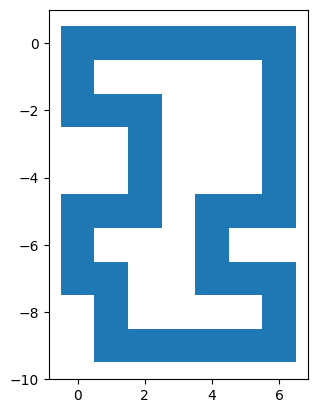

In [55]:
dig_plan.plot_trench()

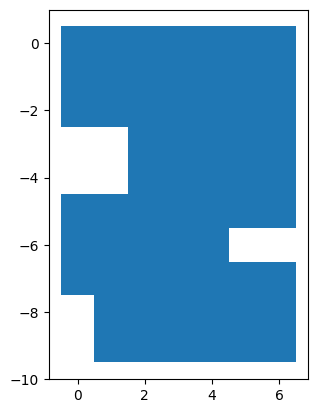

In [56]:
dig_plan.plot_inner_roof()

In [57]:
dig_plan.inner_roof.area

62.0

In [48]:
type(dig_plan.trench)

shapely.geometry.polygon.Polygon

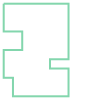

In [52]:
dig_plan.trench.exterior

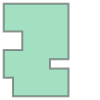

In [49]:
Polygon(dig_plan.trench.exterior)

In [38]:
dig_plan.trench_vertices

[Position(x=0, y=0),
 Position(x=6, y=0),
 Position(x=6, y=-5),
 Position(x=4, y=-5),
 Position(x=4, y=-7),
 Position(x=6, y=-7),
 Position(x=6, y=-9),
 Position(x=1, y=-9),
 Position(x=1, y=-7),
 Position(x=0, y=-7),
 Position(x=0, y=-5),
 Position(x=2, y=-5),
 Position(x=2, y=-2),
 Position(x=0, y=-2),
 Position(x=0, y=0)]

In [30]:
dig_plan.trench_line.length

38.0

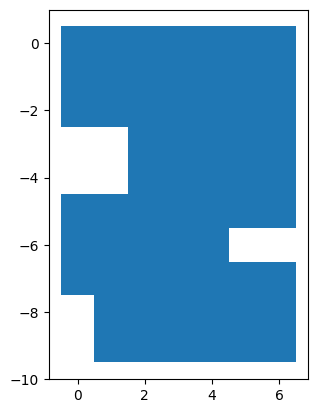

In [34]:
p = gpd.GeoSeries(dig_plan.polygon)
p.plot()
plt.show()

In [29]:
buffer(dig_plan.trench_line, 0.5, join_style="mitre").area

38.0

In [31]:
dig_plan.polygon.area

62.0

In [16]:
[pos.coordinates for pos in dig_plan.trench_vertices.keys()]

[(0, 0),
 (6, 0),
 (6, -5),
 (4, -5),
 (4, -7),
 (6, -7),
 (6, -9),
 (1, -9),
 (1, -7),
 (0, -7),
 (0, -5),
 (2, -5),
 (2, -2),
 (0, -2)]

In [16]:
with open('input_old.txt', 'r') as f:
    orig_inp = f.readlines()

new_input = []
for line in orig_inp:
    direction, length, color = line.split()
    new_input.append(f"{direction} {length}")

new_input = '\n'.join(new_input)

new_input = new_input.replace('U', 'N').replace('D','Z').replace('L', 'W').replace('R', 'O')

with open('input.txt', 'w') as f:
    f.write(new_input)


In [11]:
TEST_INPUT = """R 6
D 5
L 2
D 2
R 2
D 2
L 5
U 2
L 1
U 2
R 2
U 3
L 2
U 2"""

In [17]:
print(TEST_INPUT.replace('U', 'N').replace('D','Z').replace('L', 'W').replace('R', 'O'))

O 6
Z 5
W 2
Z 2
O 2
Z 2
W 5
N 2
W 1
N 2
O 2
N 3
W 2
N 2


In [ ]:
new_input.replace('U', 'N').replace('D','S').replace('L', 'W').replace('R', 'E')

In [7]:
with open('input.txt', 'w') as f:
    f.write('\n'.join(new_input))

In [14]:
test_aswer = """#######
#.....#
###...#
..#...#
..#...#
###.###
#...#..
##..###
.#....#
.######"""

In [15]:
test_aswer.count("#")

38

In [18]:
"""#######
#######
#######
..#####
..#####
#######
#####..
#######
.######
.######""".count("#")

62